In [21]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Using this for evaluation
from sklearn.metrics import classification_report, confusion_matrix

# For consistent visuals and reproducibility
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
np.random.seed(42)
tf.random.set_seed(42)

print("✅ All libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")



✅ All libraries imported successfully!
TensorFlow version: 2.19.0


In [22]:
# Loading the 60 k train + 10 k test handwritten digit images
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# It always inspect shape before preprocessing
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


Training set: (60000, 28, 28) (60000,)
Testing set: (10000, 28, 28) (10000,)


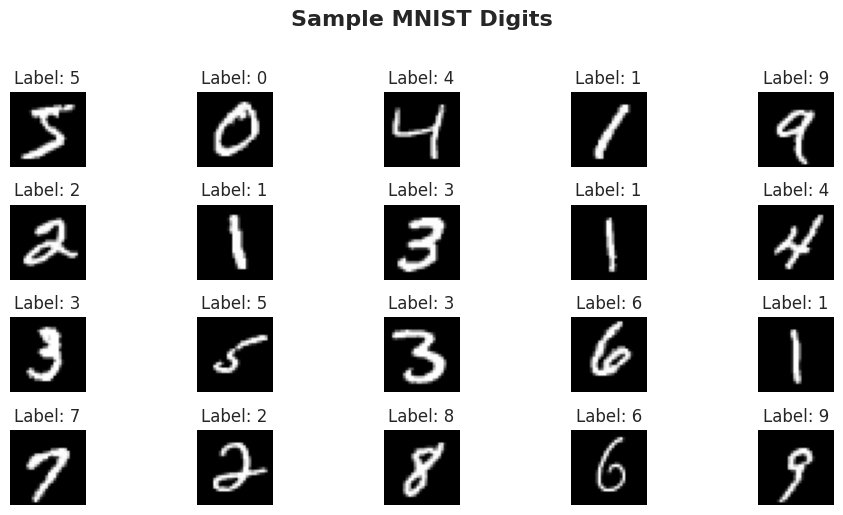

In [23]:
# Providing us with a quick Visualization
plt.figure(figsize=(10,5))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample MNIST Digits", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


In [24]:
# Normalizing pixel values from [0,255] → [0,1]
X_train_norm = X_train / 255.0
X_test_norm  = X_test / 255.0

# One-hot encode labels (so output matches 10-neuron softmax)
y_train_enc = to_categorical(y_train)
y_test_enc  = to_categorical(y_test)

# Now we Flatten 28×28 → 784-dim vectors (for Dense layers)
X_train_flat = X_train_norm.reshape(-1, 28*28)
X_test_flat  = X_test_norm.reshape(-1, 28*28)

print("X_train_flat shape:", X_train_flat.shape)
print("y_train_enc shape:", y_train_enc.shape)


X_train_flat shape: (60000, 784)
y_train_enc shape: (60000, 10)


In [25]:
# Sequential model = stack of layers
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)), # hidden 1
    Dropout(0.2), # regularization
    Dense(64, activation='relu'), # hidden 2
    Dense(10, activation='softmax') # output layer
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(
    optimizer='adam', # adaptive learning rate
    loss='categorical_crossentropy', # multi-class loss
    metrics=['accuracy']# track accuracy
)
print("✅ Model compiled.")


✅ Model compiled.


In [27]:
# One full pass over training data
history = model.fit(
    X_train_flat,
    y_train_enc,
    epochs=15,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)


Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7730 - loss: 0.7583 - val_accuracy: 0.9473 - val_loss: 0.1823
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9373 - loss: 0.2088 - val_accuracy: 0.9588 - val_loss: 0.1347
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9528 - loss: 0.1519 - val_accuracy: 0.9647 - val_loss: 0.1117
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9625 - loss: 0.1207 - val_accuracy: 0.9678 - val_loss: 0.0990
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9695 - loss: 0.1025 - val_accuracy: 0.9707 - val_loss: 0.0944
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9728 - loss: 0.0876 - val_accuracy: 0.9734 - val_loss: 0.0868
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9759 - loss: 0.0769 - val_accuracy: 0.9748 - val_loss: 0.0853
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9790 - loss: 0.0685 - val_accuracy: 0.

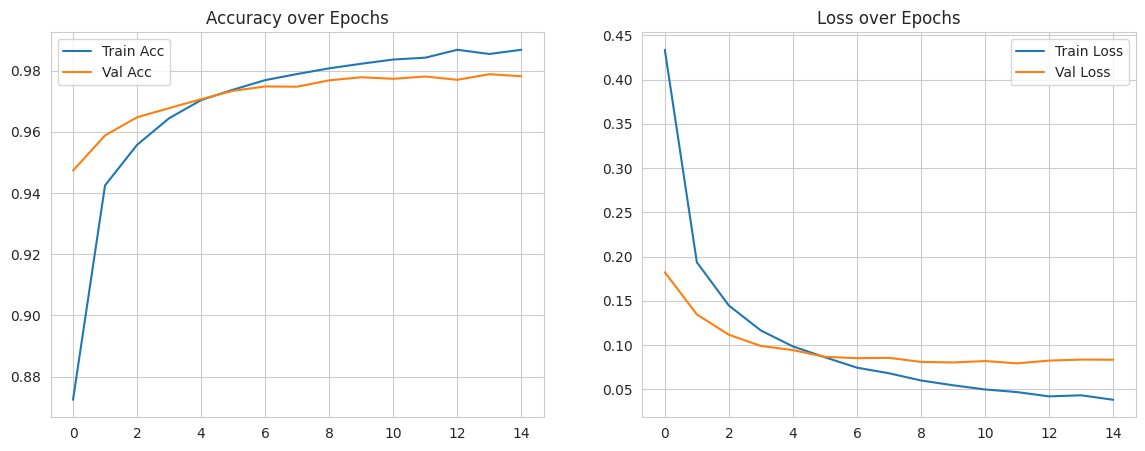

In [28]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

ax[0].plot(history.history['accuracy'], label='Train Acc')
ax[0].plot(history.history['val_accuracy'], label='Val Acc')
ax[0].set_title('Accuracy over Epochs'); ax[0].legend()

ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Val Loss')
ax[1].set_title('Loss over Epochs'); ax[1].legend()

plt.show()


In [29]:
test_loss, test_acc = model.evaluate(X_test_flat, y_test_enc, verbose=1)
print(f"Test Loss = {test_loss:.4f}")
print(f"Test Accuracy = {test_acc*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9733 - loss: 0.0938
Test Loss = 0.0789
Test Accuracy = 97.77%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


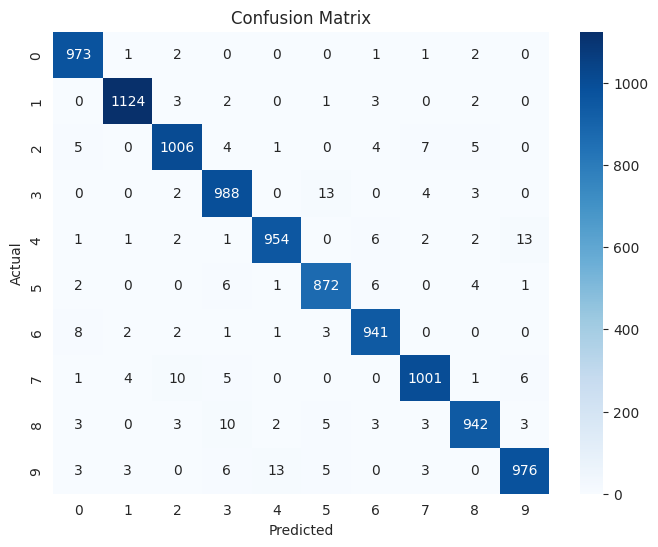

In [30]:
y_pred_probs = model.predict(X_test_flat)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_enc, axis=1)

# Confusion matrix for extra insight
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()


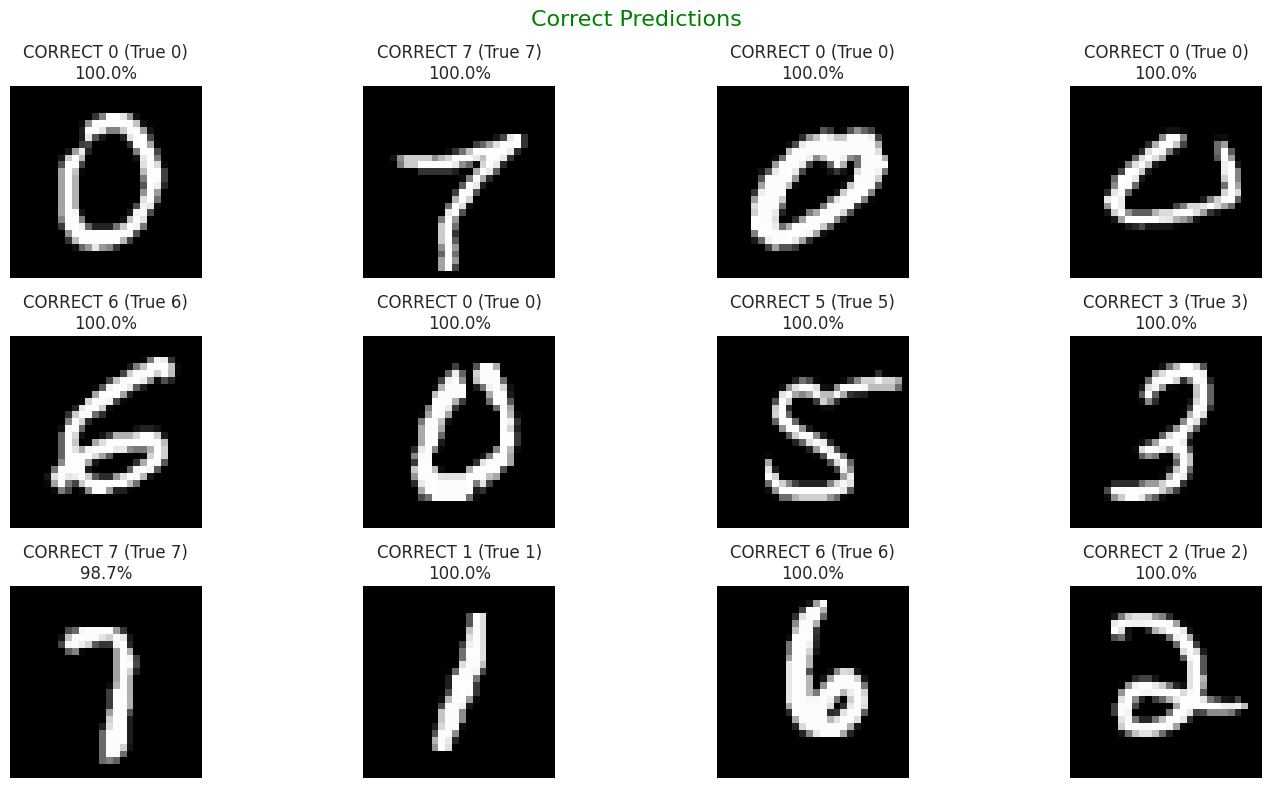

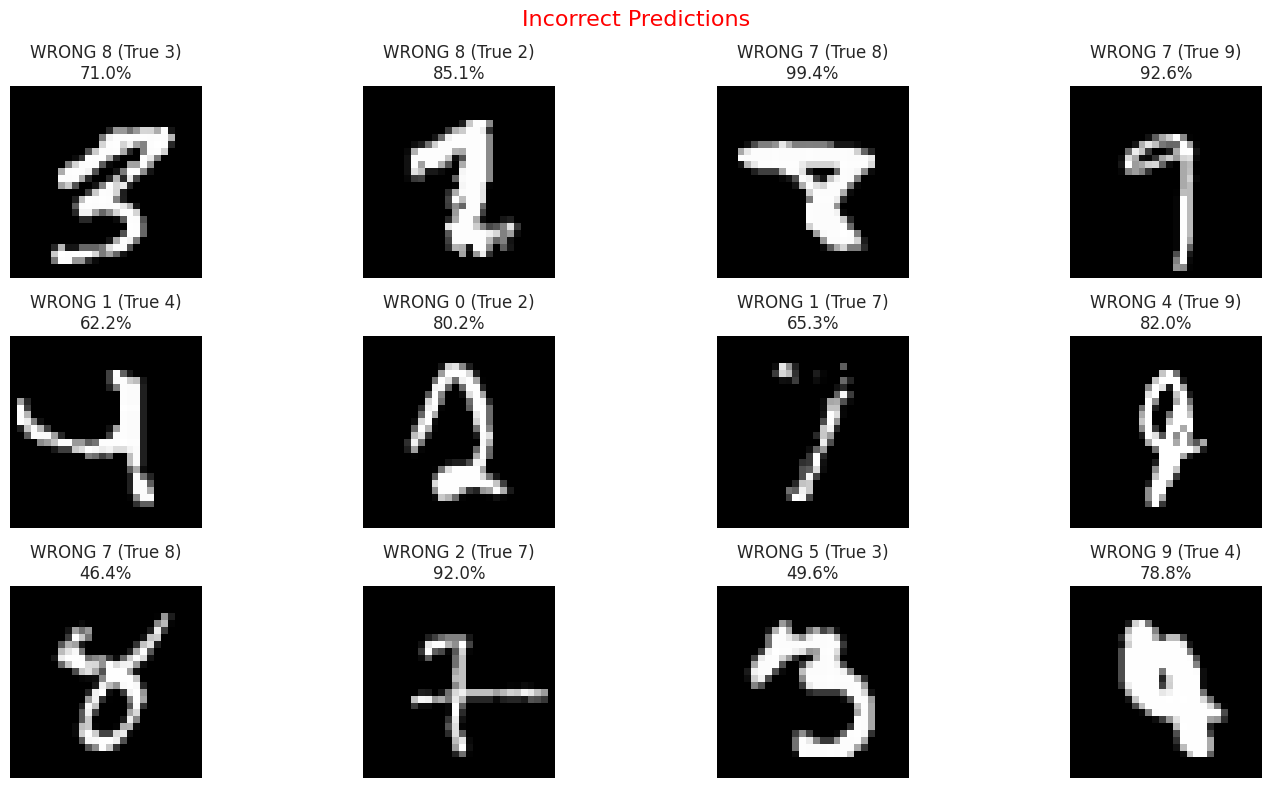

In [31]:
# Correct examples
correct_idx = np.where(y_pred == y_true)[0]
sample_correct = np.random.choice(correct_idx, 12, replace=False)

plt.figure(figsize=(15,8))
for i, idx in enumerate(sample_correct):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[idx], cmap='gray')
    conf = y_pred_probs[idx][y_pred[idx]]*100
    plt.title(f"CORRECT {y_pred[idx]} (True {y_true[idx]})\n{conf:.1f}%")
    plt.axis('off')
plt.suptitle("Correct Predictions", fontsize=16, color='green')
plt.tight_layout(); plt.show()

# Incorrect examples
wrong_idx = np.where(y_pred != y_true)[0]
if len(wrong_idx) > 0:
    sample_wrong = np.random.choice(wrong_idx, 12, replace=False)
    plt.figure(figsize=(15,8))
    for i, idx in enumerate(sample_wrong):
        plt.subplot(3,4,i+1)
        plt.imshow(X_test[idx], cmap='gray')
        conf = y_pred_probs[idx][y_pred[idx]]*100
        plt.title(f"WRONG {y_pred[idx]} (True {y_true[idx]})\n{conf:.1f}%")
        plt.axis('off')
    plt.suptitle("Incorrect Predictions", fontsize=16, color='red')
    plt.tight_layout(); plt.show()


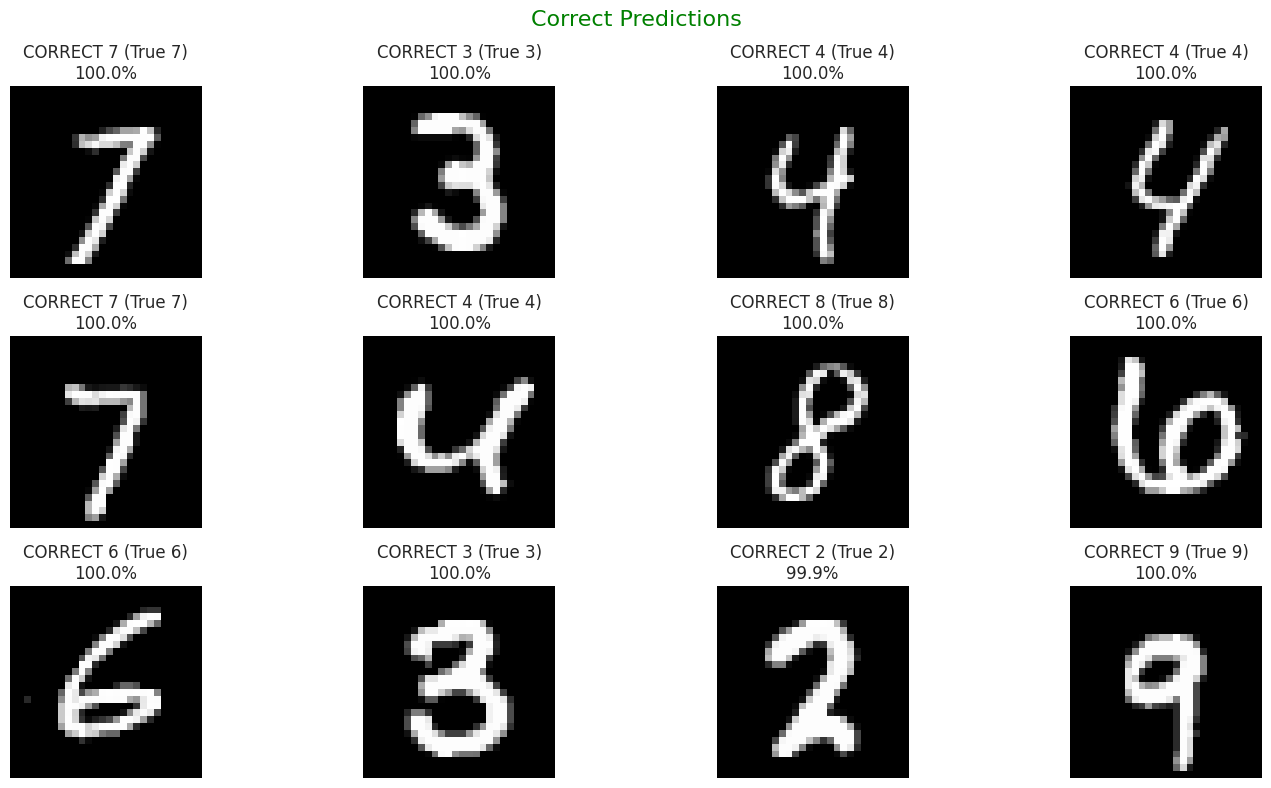

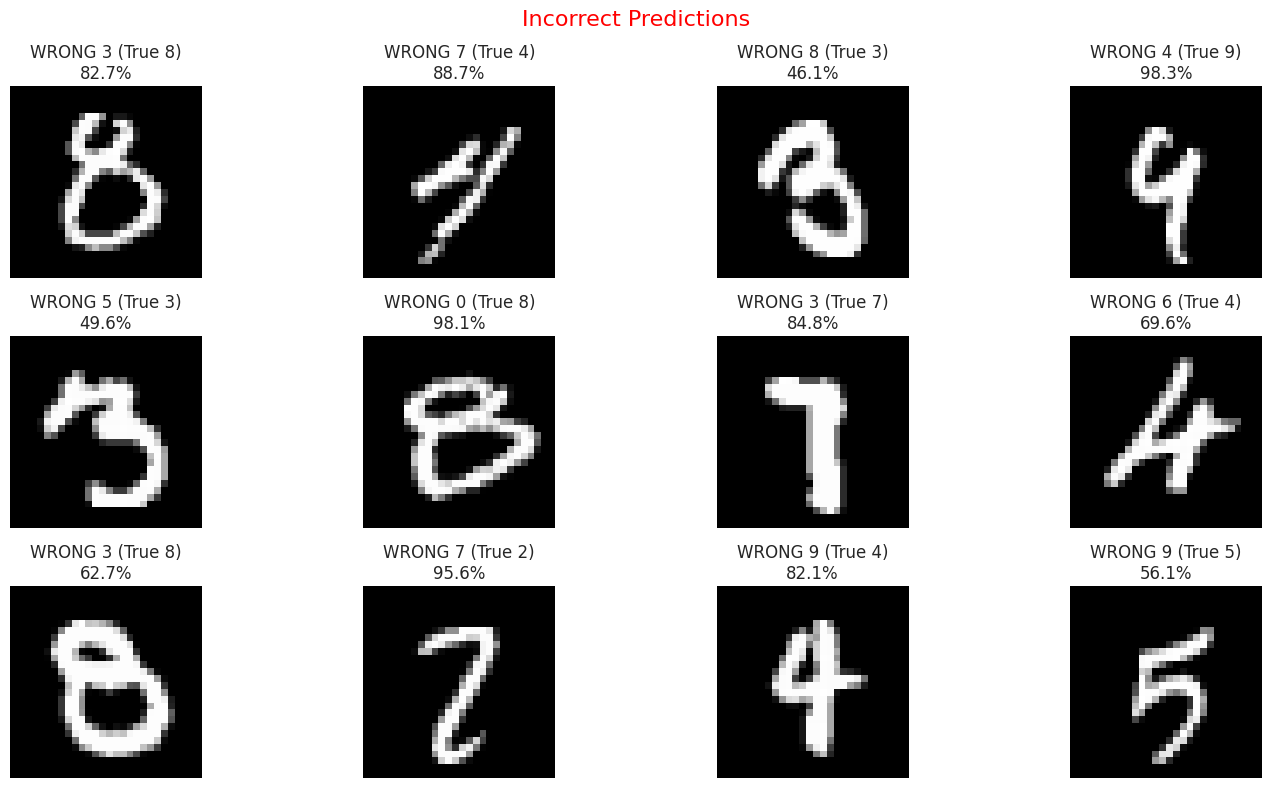

In [32]:
# Correct examples
correct_idx = np.where(y_pred == y_true)[0]
sample_correct = np.random.choice(correct_idx, 12, replace=False)

plt.figure(figsize=(15,8))
for i, idx in enumerate(sample_correct):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[idx], cmap='gray')
    conf = y_pred_probs[idx][y_pred[idx]]*100
    plt.title(f"CORRECT {y_pred[idx]} (True {y_true[idx]})\n{conf:.1f}%")
    plt.axis('off')
plt.suptitle("Correct Predictions", fontsize=16, color='green')
plt.tight_layout(); plt.show()

# Incorrect examples
wrong_idx = np.where(y_pred != y_true)[0]
if len(wrong_idx) > 0:
    sample_wrong = np.random.choice(wrong_idx, 12, replace=False)
    plt.figure(figsize=(15,8))
    for i, idx in enumerate(sample_wrong):
        plt.subplot(3,4,i+1)
        plt.imshow(X_test[idx], cmap='gray')
        conf = y_pred_probs[idx][y_pred[idx]]*100
        plt.title(f"WRONG {y_pred[idx]} (True {y_true[idx]})\n{conf:.1f}%")
        plt.axis('off')
    plt.suptitle("Incorrect Predictions", fontsize=16, color='red')
    plt.tight_layout(); plt.show()


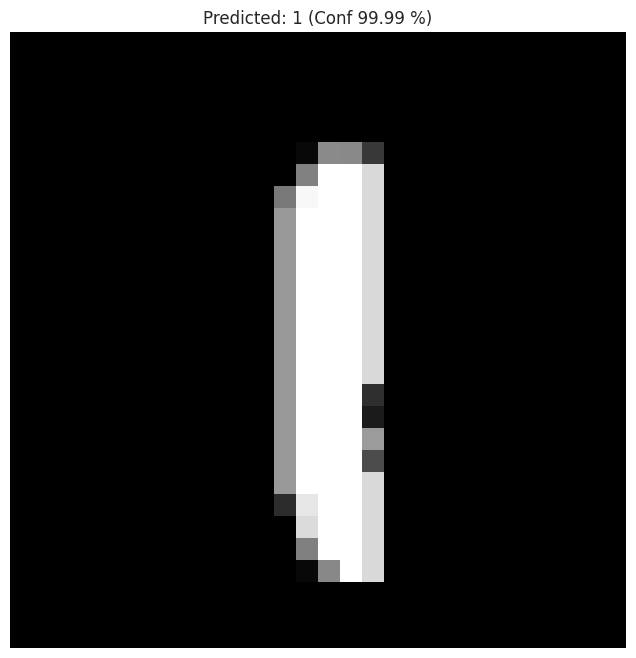

Digit 0:  0.00% 
Digit 1: 99.99% █████████████████████████████████████████████████
Digit 2:  0.00% 
Digit 3:  0.00% 
Digit 4:  0.00% 
Digit 5:  0.00% 
Digit 6:  0.00% 
Digit 7:  0.00% 
Digit 8:  0.01% 
Digit 9:  0.00% 


In [33]:
def predict_digit(index):
    """Displays a test image and prints model’s probabilities."""
    image = X_test_norm[index].reshape(1, 28*28)
    probs = model.predict(image, verbose=0)
    pred = np.argmax(probs)
    conf = probs[0][pred]*100

    plt.imshow(X_test[index], cmap='gray')
    plt.title(f"Predicted: {pred} (Conf {conf:.2f} %)")
    plt.axis('off')
    plt.show()

    for d, p in enumerate(probs[0]):
        print(f"Digit {d}: {p*100:5.2f}% {'█'*int(p*50)}")

predict_digit(np.random.randint(0, len(X_test)))


In [34]:
print("="*70)
print("MODEL SUMMARY")
print("="*70)
print(f"Training Acc (final): {history.history['accuracy'][-1]*100:.2f}%")
print(f"Validation Acc (final): {history.history['val_accuracy'][-1]*100:.2f}%")
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Total Parameters: {model.count_params():,}")
print("="*70)


MODEL SUMMARY
Training Acc (final): 98.68%
Validation Acc (final): 97.82%
Test Accuracy: 97.77%
Total Parameters: 109,386
